In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import statsmodels.api as sm

## Data Cleaning and Processing

In [2]:
def cleaner(s):
    s=re.sub(r'\W+'," ",s.lower().strip())
    return " ".join(s.split())

In [3]:
nyt=pd.read_csv('data/nyt_data_romella.csv').drop(['Unnamed: 0'],axis=1)
us_news=pd.read_csv('data/usnews_data_romella.csv').drop(['Unnamed: 0'],axis=1)[:298]
data=us_news.merge(nyt, left_on='name', right_on='name', how='left')\
    .sort_values('2022').reset_index(drop=True)
data=data[data['super_opeid'].notna()]
data.to_csv('joined.csv')

In [4]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
transformed=scaler.fit_transform(data[['mr_kq5_pq1','mr_ktop1_pq1','2022']])
mr_kq5_pq1=transformed[:,0]
mr_ktop1_pq1=transformed[:,1]
rank_2022=transformed[:,2]


## EDA

In [5]:
def label(x):
    if x<50:
        return 1
    if 50<=x<100:
        return 2
    if 100<=x<200:
        return 3
    return 4
labels=data['2022'].apply(label)
color_codes = {1:'red', 2:'orange',3:'green',4:'grey'}
colors = [color_codes[x] for x in labels]

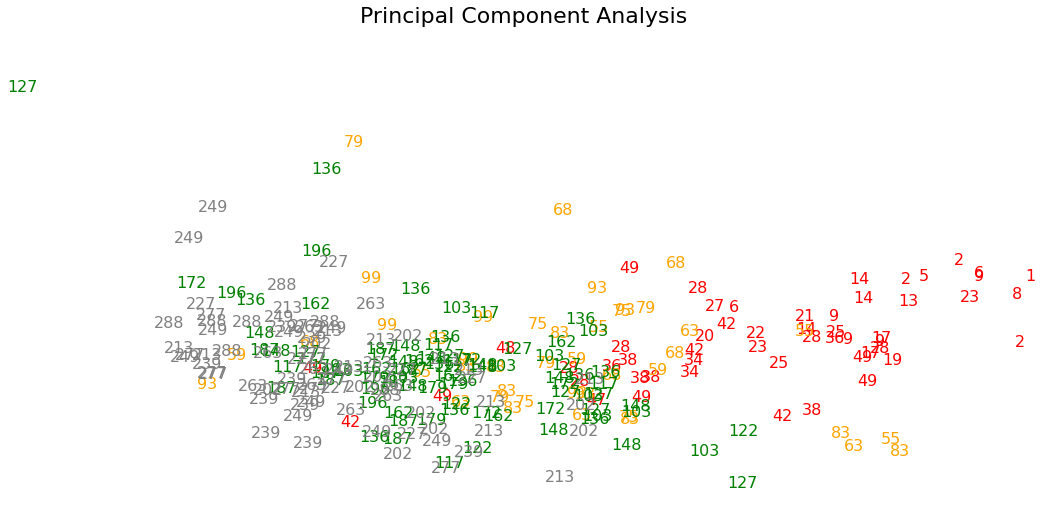

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
vecs=pca.fit_transform(StandardScaler().fit_transform(data.select_dtypes(include=np.number)))
plt.figure(figsize=(14, 8))
for x, y, rank in zip(vecs[:, 0], vecs[:, 1], data['2022']):
    plt.text(x, y, rank, alpha=1, size=16,color=color_codes[label(rank)])
plt.scatter(vecs[:, 1], vecs[:, 1], alpha=0)
plt.title("Principal Component Analysis",fontsize=22,x=0.38,y=1.1)
plt.axis('off')
plt.show()


In [31]:
np.cov(StandardScaler().fit_transform(data.select_dtypes(include=np.number)))

array([[ 3.95084741,  2.86363359,  3.41061539, ..., -1.53829614,
        -1.18743933, -0.83201017],
       [ 2.86363359,  2.45648517,  2.63368541, ..., -1.21103303,
        -0.79492825, -0.59904712],
       [ 3.41061539,  2.63368541,  3.24479036, ..., -1.32734509,
        -0.9173276 , -0.71471582],
       ...,
       [-1.53829614, -1.21103303, -1.32734509, ...,  0.98762804,
         0.71092759,  0.34345969],
       [-1.18743933, -0.79492825, -0.9173276 , ...,  0.71092759,
         0.95080701,  0.29746549],
       [-0.83201017, -0.59904712, -0.71471582, ...,  0.34345969,
         0.29746549,  0.36667985]])

In [7]:
from scipy import stats

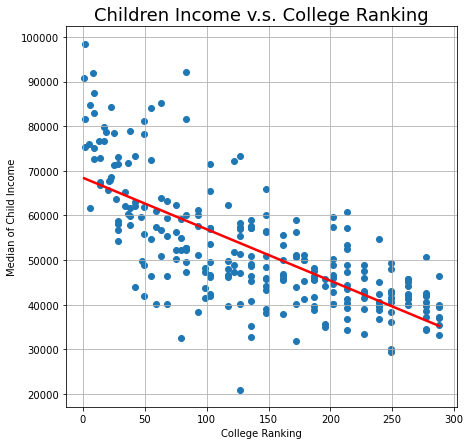

(-115.2899748163421,
 68430.27050229383,
 -0.7136702411672055,
 6.274431942443738e-42,
 7.0313860939827935)

In [15]:
plt.figure(figsize=(7, 7))
plt.scatter(data['2022'],data['k_median'])
plt.title('Children Income v.s. College Ranking',fontsize=18)
plt.xlabel('College Ranking')
plt.ylabel('Median of Child Income')
plt.grid()
m, b = np.polyfit(data['2022'], data['k_median'], 1)
plt.plot(data['2022'], m*data['2022']+b,color='red',linewidth=2.5,label='linear')
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(data['2022'],data['k_median'])
(slope, intercept, r_value, p_value, std_err)

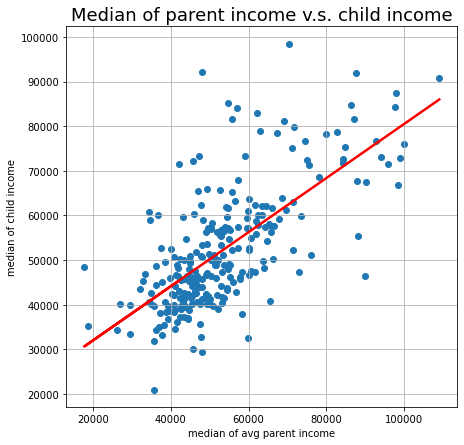

(0.6061745844430427,
 19874.058507106514,
 0.681241091270045,
 5.985848063072934e-37,
 0.04047558823551218)

In [17]:
color=lambda child,parent : 'red' if child>parent/2 else 'blue'
plt.figure(figsize=(7, 7))
plt.scatter(data['par_median']/2,data['k_median'])
plt.title('Median of parent income v.s. child income',fontsize=18)
plt.xlabel('median of avg parent income')
plt.ylabel('median of child income')
plt.grid()
m, b = np.polyfit(data['par_median']/2, data['k_median'], 1)
plt.plot(data['par_median']/2, m*data['par_median']/2+b,color='red',linewidth=2.5,label='linear')

plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(data['par_median']/2,data['k_median'])
(slope, intercept, r_value, p_value, std_err)

In [18]:
slope, intercept, r_value, p_value, std_err = stats.linregress(data['par_median']/2,data['k_median'])
(slope, intercept, r_value, p_value, std_err)
p_value

5.985848063072934e-37

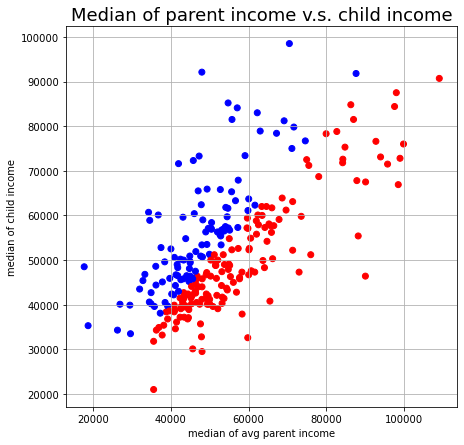

In [20]:
color=lambda child,parent : 'red' if child>parent/2 else 'blue'
plt.figure(figsize=(7, 7))
plt.scatter(data['par_median']/2,data['k_median'],color=(data['k_median']>data['par_median']/2).apply(lambda x: 'red' if x==False else 'blue'))
plt.title('Median of parent income v.s. child income',fontsize=18)
plt.xlabel('median of avg parent income')
plt.ylabel('median of child income')
plt.grid()
plt.show()

There seems to exist a relationship between parent income and child income after college. However, cases of **upward mobility** - the capacity or facility for rising to a higher social or economic position- may occur after college. Therefore, I want to invesigate on whether the ranking of the college influences the extent to upward mobility.

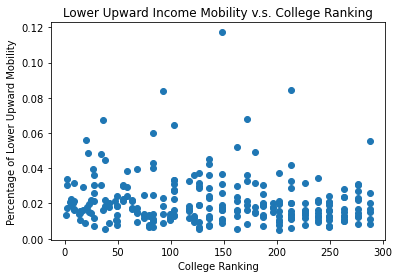

In [21]:
plt.scatter(data['2022'],data['mr_kq5_pq1'])
plt.title('Lower Upward Income Mobility v.s. College Ranking',y=1)
plt.xlabel('College Ranking',y=1.15)
plt.ylabel('Percentage of Lower Upward Mobility',x=-0.15)
plt.show()

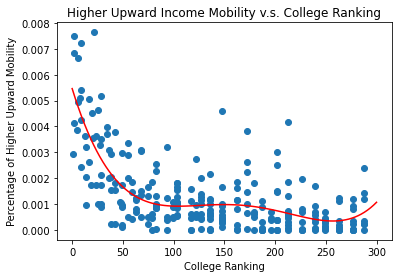

In [26]:
plt.scatter(data['2022'],data['mr_ktop1_pq1'])
plt.title('Higher Upward Income Mobility v.s. College Ranking',y=1)
plt.xlabel('College Ranking',y=1.15)
plt.ylabel('Percentage of Higher Upward Mobility',x=-0.15)
mymodel = np.poly1d(np.polyfit(data['2022'], data['mr_ktop1_pq1'], 4))
myline = np.linspace(0, 300, 100)
plt.plot(myline, mymodel(myline),linewidth=1.5,color='red')
plt.show()

In [56]:
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
for i in range(1,6):
    X=PolynomialFeatures(i).fit_transform(data[['2022']])
    model = sm.OLS(data['mr_ktop1_pq1'],X)
    results = model.fit()
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           mr_ktop1_pq1   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     123.2
Date:                Mon, 16 May 2022   Prob (F-statistic):           1.13e-23
Time:                        21:48:24   Log-Likelihood:                 1383.7
No. Observations:                 261   AIC:                            -2763.
Df Residuals:                     259   BIC:                            -2756.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0027      0.000     18.312      0.0

In [31]:
data

,2022,name,Tuition,Enrollment Numbers,super_opeid,type,tier,tier_name,iclevel,region,...,ktop1pc_cond_parq3,ktop1pc_cond_parq4,ktop1pc_cond_parq5,k_married_cond_parq1,k_married_cond_parq2,k_married_cond_parq3,k_married_cond_parq4,k_married_cond_parq5,shareimputed,imputed
0,1,princeton university,56010,4773,2627.0,2.0,1.0,Ivy Plus,1.0,1.0,...,0.145317,0.183810,0.251660,0.411867,0.494956,0.525444,0.527686,0.620366,0.0,0.0
1,2,columbia university,63530,6170,2707.0,2.0,1.0,Ivy Plus,1.0,1.0,...,0.106551,0.130200,0.187455,0.413275,0.418145,0.462518,0.530931,0.550030,0.0,0.0
2,2,harvard university,55587,5222,129.0,2.0,1.0,Ivy Plus,1.0,1.0,...,0.169098,0.183776,0.225979,0.445324,0.455767,0.547267,0.470852,0.553095,0.0,0.0
3,2,massachusetts institute of technology,55878,4361,2178.0,2.0,1.0,Ivy Plus,1.0,1.0,...,0.163882,0.193829,0.224180,0.437064,0.468327,0.561692,0.548681,0.576499,0.0,0.0
4,5,yale university,59950,4703,1426.0,2.0,1.0,Ivy Plus,1.0,1.0,...,0.153884,0.154524,0.200766,0.447131,0.448858,0.458090,0.512265,0.578231,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,288,long island university,39920,10403,122.0,2.0,6.0,Selective private,1.0,1.0,...,0.007312,0.012418,0.013306,0.298664,0.316671,0.372318,0.462382,0.524552,0.0,0.0
291,288,marshall university,19606,8771,3815.0,1.0,5.0,Selective public,1.0,3.0,...,0.013511,0.010629,0.022145,0.467330,0.535720,0.560986,0.607998,0.608144,0.0,0.0
292,288,middle tennessee state university,29584,19188,3510.0,1.0,5.0,Selective public,1.0,3.0,...,0.008001,0.007019,0.010119,0.460172,0.478624,0.598236,0.634946,0.620729,0.0,0.0
294,288,portland state university,23769,18959,3216.0,1.0,5.0,Selective public,1.0,4.0,...,0.011423,0.007636,0.014915,0.487106,0.452873,0.499369,0.548389,0.540191,0.0,0.0
